#  Neural Networks and beyond
### By Prithvishankar Srinivasan (prithvis)

In this tutorial we will be talking about a basic introduction to the concept of ** Neural Networks ** and a brief overview about two libraries in python which implement Neural Networks, namely, **Keras** and **Pybrain**. this tutorial will be covering in brief about the following topics:

* [Introduction](#What-is-a-Neural-Network?)
* [Sample Neural Network using PyBrain](#A-sample-XOR-problem-using-PyBrain)
* [Multiclass Classification using PyBrain](#Multiclass-Classification-using-PyBrain)
* [Convolutional Neural Networks using Keras](#Convolutional-Neural-Networks-using-Keras)
* [A brief insight into RNN](#A-brief-insight-into-RNN)
* [Summary](#Summary)
* [References](#References)
* [Future work](#Future-work)





## What is a Neural Network?

According to Dr. Robert Hecht- Nielsen, who is one of the pioneers of neural networks, Neural network is *a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs.*
In "Neural Network Primer: Part I" by Maureen Caudill, AI Expert, Feb. 1989

It comprises of a highly interconnected set of processing elements called neurons (named after neurons in the brain) or nodes.They are usually designed for a specific function such as data classification or pattern recognition in datasets. Neural neworks are typically organized in layers. 

Layers are made up of a number of interconnected 'nodes' which contain an 'activation function'. Each of these connections have a weight associated to them. There are 3 types of layers in Neural Network each containing a different number of nodes. First, is the input layer where all the input data is fed in. Next, is the hidden layer where computation takes place. More the number of hidden nodes, the higher will be the training accuracy but there is a trade-off between training accuracy and complexity of the neural network. Also, choosing a very high number of hidden layer nodes may result in overfitting the data which results to poor performance of test data. the final layer s the output layer which may contain more than one node. While there can be only one input layer and output layer, there may exist more than one hidden layer. 


<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" height="500" width="500"> 

Image source: http://cs231n.github.io/neural-networks-1/


## A sample XOR problem using PyBrain

XOR is one of the simplest problems to solve using a neural network. In this solution, we will be constructing the network using 1 input layer consisting of 2 nodes, 1 hidden layer consisting of 3 nodes and 1 output layer consisting of a single node. First, let us construct the network. We will be using a Feed forward network which progresses only in one direction and does not contain loops or connections in the other direction. You can install PyBrain using the first cell and import it to your notebook using the second cell

In [ ]:
!git clone git://github.com/pybrain/pybrain.git
!python setup.py install

In [2]:
from pybrain.structure import FeedForwardNetwork
nn= FeedForwardNetwork()

Next we are going to construct the input, hidden and output layers. We are using a tanh function for the hidden layer. Other functions such as sigmoid exist and the entire list can be found at http://pybrain.org/docs/api/structure/modules.html

In [3]:
from pybrain.structure import LinearLayer, TanhLayer
inLayer = LinearLayer(2)
hiddenLayer = TanhLayer(3)
outLayer = LinearLayer(1)
nn.addInputModule(inLayer)
nn.addModule(hiddenLayer)
nn.addOutputModule(outLayer)

Next we need to form the connections between the layers. We are going with the full connection scenario where each node is connected to every node in the subsequent layer

In [4]:
from pybrain.structure import FullConnection
in_to_hidden = FullConnection(inLayer, hiddenLayer)
hidden_to_out = FullConnection(hiddenLayer, outLayer)

Finally we need to add the formed connections to the neural network

In [5]:
nn.addConnection(in_to_hidden)
nn.addConnection(hidden_to_out)
nn.sortModules()

You can view the modules available in the network and it's connections as below.

In [6]:
print nn

FeedForwardNetwork-6
   Modules:
    [<LinearLayer 'LinearLayer-3'>, <TanhLayer 'TanhLayer-7'>, <LinearLayer 'LinearLayer-8'>]
   Connections:
    [<FullConnection 'FullConnection-4': 'LinearLayer-3' -> 'TanhLayer-7'>, <FullConnection 'FullConnection-5': 'TanhLayer-7' -> 'LinearLayer-8'>]



Next we add form the data set for XOR according to the table below

<img src="TRUTH-TABLE-1.jpg", height="150", width="150">
Image source: http://www.electronicshub.org/exclusive-or-gatexor-gate/

In [7]:
from pybrain.datasets import SupervisedDataSet
data = SupervisedDataSet(2, 1)
data.addSample((0, 0), (0,))
data.addSample((0, 1), (1,))
data.addSample((1, 0), (1,))
data.addSample((1, 1), (0,))

Finally, we can train the neural network and check our outputs. The activate function is used to send inputs to the  neural networks and to activate the network. A **BackpropTrainer** is a trainer which propogates the error backwards and trains the neural network based on the supervised dataset. The final output layer will consist a vector of n nodes. Then the error in the final output layer will also be a vector of n values. Now, this erros is propagated recursively in the neural netwok in the reverse direcction. Now, with the knowledge of this error, the values of weights in the network are changed to fit the data better. This is the basis of Backpropagation trainer. In this example, we train the network 5000 times

In [10]:
from pybrain.supervised.trainers import BackpropTrainer
trainer = BackpropTrainer(nn, data)
for i in xrange(5000):
    trainer.train()
print '0,0 :',(nn.activate([0, 0]))
print '0,1 :',(nn.activate([0, 1]))
print '1,0 :',(nn.activate([1, 0]))
print '1,1 :',(nn.activate([1, 1]))

0,0 : [ 0.]
0,1 : [ 1.]
1,0 : [ 1.]
1,1 : [  1.15463195e-14]


## Multiclass Classification using PyBrain

Another important use of a neural network is for multiclass classfication. So far, we have seen binary classifiers where the output has either been 0 or 1. That is the presence or absence of a class. To understand a multiclass classifier, let us try to realise MNIST classification using Pybrain. MNIST is a famous dataset containing handwritten digits from 0-9. In the following code block, we import the data set from sklearn library. Split the data set into training and test set in 70:30 ratio. The shape of the various variables are printed and a sample image is displayed.

<img src="https://tgmstat.files.wordpress.com/2013/05/multiclass_neural_network_example.png" height="350" width="350"> 
Image source: https://tgmstat.wordpress.com/2013/06/05/coursera-machine-learning-neural-networks/



(1797, 64)
(1797,)
(1797, 8, 8)


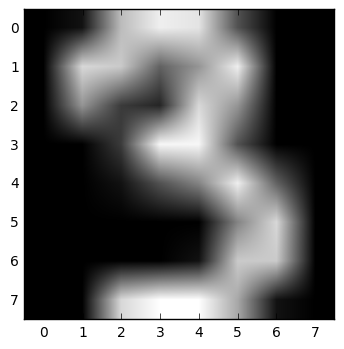

In [40]:
from sklearn import datasets
from scipy.misc import toimage
import matplotlib.pyplot as plt
digits=datasets.load_digits()
train=digits.data[:1258,:]
train_label=digits.target[:1258]
test=digits.data[1258:,:]
test_label=digits.target[1258:]
#We can see the format of the various data
print digits.data.shape
print digits.target.shape
print digits.images.shape
#A random sample is plotted
plt.imshow(toimage(digits.images[1110]),cmap='Greys_r')
plt.show()

Now, to implement the multiclass classifier, we build the neural network using the buildNetwork shortcut tool with two hidden layers, 1 input layer consisting of 64 nodes for each point of data in the image and 1 output layer consisting of 10 nodes for the 10 digits. Essentially, it is an array of 10 binary classifiers and the class with the highest output is predicted

In [43]:
from pybrain.tools.shortcuts import buildNetwork
import numpy as np
#buildNetwork is a shortcut to build Neural networks where the first parameter is the number of input nodes and 
#the last parameter is the number of output nodes
net = buildNetwork(64, 100, 100, 10)
data = SupervisedDataSet(64, 10)
i=0
while i<1258:
    out= np.zeros(10)
    out[train_label[i]]=1
    data.addSample(train[i,:],out)
    i+=1
trainer = BackpropTrainer(net, data)
for j in xrange(1000):
    trainer.train()
    if j%100==0:
        print j," iterations done"
print "Network fully trained"

0  iterations done
100  iterations done
200  iterations done
300  iterations done
400  iterations done
500  iterations done
600  iterations done
700  iterations done
800  iterations done
900  iterations done
Network fully trained


Now that the system is trained, we activate the neural functions on all test samples and calculate the error rate. We have got an accuracy of ~85%. A higher accuracy can be achieved easily by playing arround with the hidden layer and the number of times the network is trained or by using a validation set. We should ensure that we don't overfit the data by training repeatedly.

In [42]:
out = net.activate(test[20,:])
#Printing sample output for random test case
print out
print np.argmax(out), test_label[20]
i=0
count=0
while(i<len(test_label)):
    out=net.activate(test[i,:])
    if (np.argmax(out)!=test_label[i]):
        count+=1
    i+=1
print "Error rate:",count/float(len(test_label))

[ 0.01882668 -0.05887212  0.01198453 -0.0078867   0.84550883  0.15440724
  0.03036503 -0.03395434  0.07942146 -0.03366469]
4 4
Error rate: 0.152133580705


## Convolutional Neural Networks using Keras

A convolutional neural network often consists of one or more convoluted layers followed by a fully connected layer. A convoluted neural network takes advantage of the spatial features of a 2D image and preserve its original structure. The input to a convolutional layer is a m x m x r image where m is the height and width of the image and r is the number of channels, e.g. an RGB image has r=3. The convolutional layer will have k filters (or kernels) of size n x n x q where n is smaller than the dimension of the image and q can either be the same as the number of channels r or smaller and may vary for each kernel. We can implement a simple CNN below, on the same MNIST data. But here, r=1 as the images are in grayscale.

In [ ]:
#Code to install tensorflow and keras
!pip install tensorflow
!pip install keras
#Kindly restart Jupyter Notebook after this installation

In [7]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [8]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][dimension][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Now after the dataset is loaded, we can now initialize the CNN model as given below. There are three different kind of layers which are to be added below.

* A convolutional layer consists of filters and feature maps. The filters are the neurons of the CNN. They have inputs and output a value. The input size will be the size of the square patch. Feature map is the output of the filter applied to the previous layer
* A pooling layer is a technique to compress or generalize feature representations and generally reduce the overfitting of the training data by the model. They consolidated the features learned in the previous steps which basically down-samples the previous layer feature map
* A fully-connected layer is a dense linear layer which is used after the convolutional and pooling layers to predict the output probabilities. <br\>

Dropout: CNN tends to overfit data even when pooling layers are used. Thus, dropout is used to randomly drop a portion of the input data before processing the output for the next layer

Shown below, is a sample image of the layers of a typical CNN

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png" height="500" width="750"> 
Image source: http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/

In [16]:
# create model
model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
lrate = 0.01
epochs=10
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [17]:
print model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=200, verbose=True)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_14 (Convolution2D) (None, 32, 24, 24)    832         convolution2d_input_7[0][0]      
____________________________________________________________________________________________________
maxpooling2d_9 (MaxPooling2D)    (None, 32, 12, 12)    0           convolution2d_14[0][0]           
____________________________________________________________________________________________________
dropout_11 (Dropout)             (None, 32, 12, 12)    0           maxpooling2d_9[0][0]             
____________________________________________________________________________________________________
flatten_6 (Flatten)              (None, 4608)          0           dropout_11[0][0]                 
___________________________________________________________________________________________

You can see that a simple CNN has achieved much better results than a regular Neural Network. It is able to receive such high results as the data set is limited and the number of channels is only 1 as the data consists of grayscale images. To achieve better accuracy, a lot of parameters can be adjusted in the CNN network, including but not limited to, number of layers, size of square patch taken, optimizer used, activation function used etc.

## A brief insight into RNN 

So far, both CNNs and regular neural networks consider all inputs to be independent of each other. Al though CNN takes into account the spatial relationship of the inputs, it does not take into consideration the type of relationship with past inputs. This is where RNN or **Recurrent Neural Networks** comes into place. RNN makes use of sequential information. So, the output of nodes in later stages are fed to the inputs of other nodes. Hence, it is very popularly used in Natural Language Processing applications. The most popular RNN is LSTM- **Long short-term memory**. It is easier to visualize a RNN as below where the loop is unfolded and the direction of dataflow is clear.

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/rnn.jpg" height="300" width="500">
Image source: http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/

### Summary

This tutorial was focussed on the basics of how to build a neural network for a simple problem followed by a multiclass classification problem. It later delved into the concept of Convolutional Neural Network and its necessity. Finally, a brief overview about Recurrent Neural Network was given.

### References

1. http://nbviewer.jupyter.org/github/masinoa/machine_learning/blob/master/04_Neural_Networks.ipynb
2. https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb
3. https://www.doc.ic.ac.uk/~nd/surprise_96/journal/vol4/cs11/report.html#What_is_a_Neural_Network
4. http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/
5. https://keras.io/
6. http://pybrain.org/docs/

### Future work

For general questions about neural networks, visit https://stackoverflow.com/questions/tagged/neural-network . <br\>
for immediate future work, a sample program could be implemented for RNN in NLP domain. Other applications can be realised using neural networks and convolutional neural networks, for example, classifying the CIFAR-10 dataset found here. https://www.cs.toronto.edu/~kriz/cifar.html <br\>
You can possibly check out other libraries which implement neural network. Please find links below
1. Theano: http://deeplearning.net/software/theano/
2. Tensorflow: https://www.tensorflow.org/
3. Neurolab: https://pythonhosted.org/neurolab/

